# Introduction to GPS Tracking of Birds

- Learn how GPS data can be used to track bird migration patterns

In [1]:
import pandas as pd

In [2]:
birddata = pd.read_csv("bird_tracking.csv")

In [3]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [4]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [5]:
import matplotlib.pyplot as plt
import numpy as np

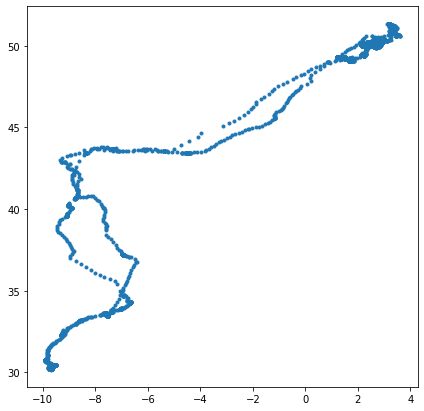

In [6]:
ix = birddata.bird_name == "Eric"
x, y = birddata.longitude[ix], birddata.latitude[ix] 

plt.figure(figsize= (7, 7))
plt.plot(x,y, ".");

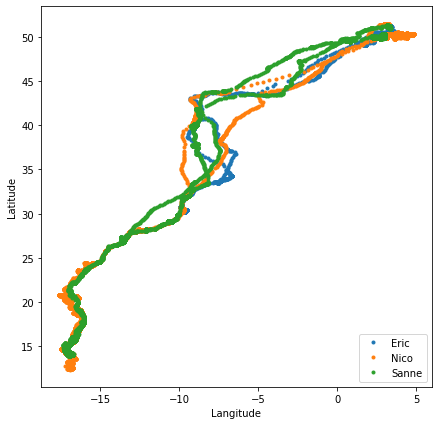

In [7]:
bird_names = pd.unique(birddata.bird_name)
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x, y = birddata.longitude[ix], birddata.latitude[ix] 
    plt.plot(x,y, ".", label = bird_name)
plt.xlabel("Langitude")
plt.ylabel("Latitude")
plt.legend(loc = "lower right")
plt.savefig("3traj.pdf")

 # Examining Flight Speed
 
- Learn how to examine 2D flight speed of the birds
- Learn how to deal with data entries that are not numeric

(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <BarContainer object of 10 artists>)

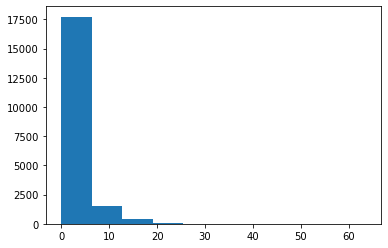

In [8]:
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
plt.hist(speed)

In [9]:
np.isnan(speed)

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [10]:
np.isnan(speed).any()
np.sum(np.isnan(speed))

85

In [11]:
ind = np.isnan(speed)
ind

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [12]:
~ind

0        True
1        True
2        True
3        True
4        True
         ... 
19790    True
19791    True
19792    True
19793    True
19794    True
Name: speed_2d, Length: 19795, dtype: bool

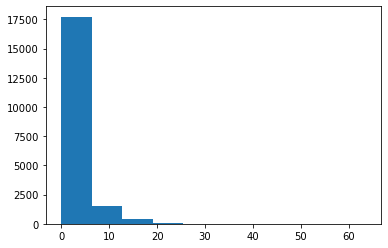

In [13]:
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
ind= np.isnan(speed)
plt.hist(speed[~ind])
plt.savefig("hist.pdf")

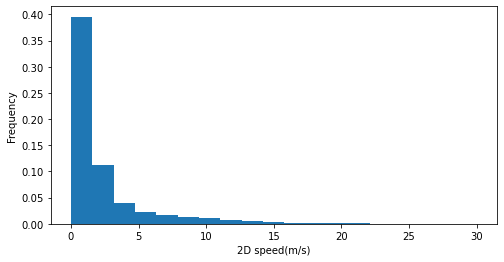

In [14]:
plt.figure(figsize =(8,4))
speed = birddata.speed_2d[ix]
ind= np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0,30,20), density= True)
plt.xlabel("2D speed(m/s)")
plt.ylabel("Frequency")
plt.savefig("hist2.pdf")

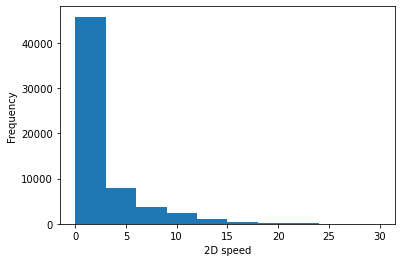

In [15]:
birddata.speed_2d.plot(kind= 'hist', range= [0,30])
plt.xlabel("2D speed");
plt.savefig("pd_hist.pdf")

# 4.2.4: Using Datetime

- Learn how deal with timestamped data using datetime
- Learn how to measure elapsed time

In [16]:
birddata.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [17]:
import datetime
datetime.datetime.today()

datetime.datetime(2021, 2, 6, 20, 14, 30, 711880)

In [18]:
time_1 = datetime.datetime.today()
time_2 = datetime.datetime.today()

In [19]:
time_2-time_1

datetime.timedelta(0)

In [20]:
date_str = birddata.date_time[0]

In [21]:
date_str

'2013-08-15 00:18:08+00'

In [22]:
date_str[:-3]

'2013-08-15 00:18:08'

In [23]:
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [24]:
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime\
                      (birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

birddata["timestamp"] = pd.Series(timestamps, index = birddata.index)
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [25]:
birddata.date_time[birddata.bird_name =="Sanne"]

40916    2013-08-15 00:01:08+00
40917    2013-08-15 00:31:00+00
40918    2013-08-15 01:01:19+00
40919    2013-08-15 01:31:38+00
40920    2013-08-15 02:01:24+00
                  ...          
61915    2014-04-30 22:00:08+00
61916    2014-04-30 22:29:57+00
61917    2014-04-30 22:59:52+00
61918    2014-04-30 23:29:43+00
61919    2014-04-30 23:59:34+00
Name: date_time, Length: 21004, dtype: object

In [26]:
birddata.timestamp[4] - birddata.timestamp[3]

Timedelta('0 days 00:29:51')

In [27]:
times = birddata.timestamp[birddata.bird_name=="Eric"]
elapsed_time = [time - times[0] for time in times]
elapsed_time[:3]

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:29:59'),
 Timedelta('0 days 00:59:50')]

In [28]:
elapsed_time[1000] / datetime.timedelta(days = 1)

12.084722222222222

In [29]:
elapsed_time[1000] / datetime.timedelta(hours = 1)

290.03333333333336

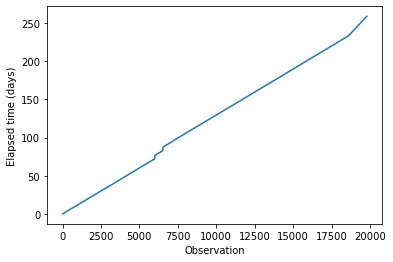

In [30]:
plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)");
plt.savefig("timeplot.pdf")

### Learn how to calculate and plot daily mean speed


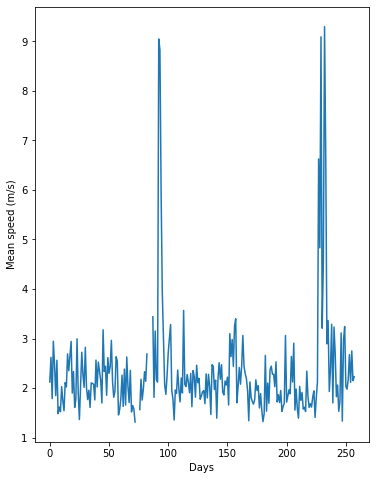

In [31]:
data = birddata[birddata.bird_name=="Eric"]
times = data.timestamp
elapsed_time = [time - times[0] for time in times]
elapsed_day = np.array(elapsed_time)/datetime.timedelta(days=1)
next_day = 1
inds= []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_day):
    if t< next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []
        
plt.figure(figsize = (6, 8))
plt.plot(daily_mean_speed)
plt.ylabel("Mean speed (m/s)")
plt.xlabel("Days")
plt.savefig("DMS.pdf")

### Using the Cartopy Library


In [32]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

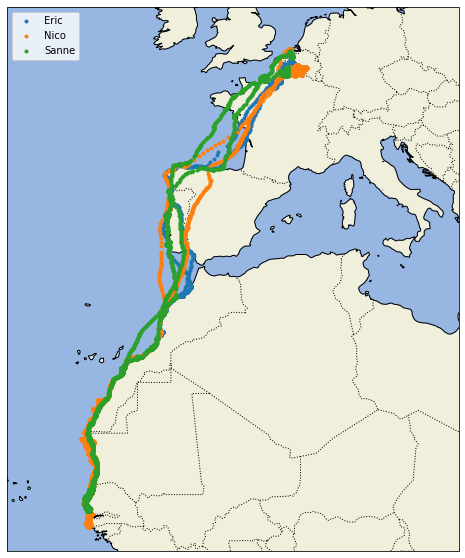

In [33]:
proj = ccrs.Mercator()



plt.figure(figsize = (10, 10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle = ':')

for name in bird_names:
    ix = birddata["bird_name"] == name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, '.', transform = ccrs.Geodetic(), label =name)

plt.legend(loc = "upper left")
plt.savefig("map.pdf")